In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import math
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
data=pd.read_csv('Digit_dataset.csv')   # Read the data

In [4]:
data.shape                

(42000, 785)

In [5]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1]:
""" The dimension of the dataset is 784. This is 28*28 matrix. Let's average each row of the pixel matrix.
    Thus we will get 28 dimensions. The code below creates a list of indices(slice_list) in the feature vector 
    in 28 step increment.
"""

slice_list=[0]                                      
while(slice_list[-1]<=756):
    slice_list.append(slice_list[-1]+28)
slice_list

[0,
 28,
 56,
 84,
 112,
 140,
 168,
 196,
 224,
 252,
 280,
 308,
 336,
 364,
 392,
 420,
 448,
 476,
 504,
 532,
 560,
 588,
 616,
 644,
 672,
 700,
 728,
 756,
 784]

In [6]:
labels=data['label']   # Store the target label in labels
labels.shape

(42000,)

In [7]:
data.drop('label',axis=1,inplace=True)  # drop the target variable from the data

In [ ]:
""" Make use of the slice_list we have created to average each row and form a new 28 dimensional feature vector
    from 784 dimensional feature vector. CAUTION: This operation will take atleast 30 minutes
"""

df=pd.DataFrame()                    
for j in range(0,data.shape[0]):
    #print(j)
    row_list=[]
    for i in range(0,28):
        row_list.append(data.iloc[j,slice_list[i]:slice_list[i+1]].mean())
    df=pd.concat([df,pd.DataFrame(row_list).T])

In [3]:
# To avoid the above operation again, store the new feature matrix in a file named Digit_cleaned.csv 
df.to_csv('Digit_cleaned.csv')   

# Build models on Digit_cleaned.csv

In [2]:
data=pd.read_csv('Digit_cleaned.csv')

In [3]:
data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,19,20,21,22,23,24,25,26,27,label
0,0,0.0,0.0,0.0,0.0,19.178571,28.107143,28.607143,28.607143,28.607143,...,28.642857,29.321429,33.821429,34.785714,18.821429,0.000000,0.0,0.0,0.0,1
1,1,0.0,0.0,0.0,0.0,24.035714,71.821429,99.321429,115.142857,116.321429,...,92.464286,122.535714,106.785714,90.714286,51.000000,0.000000,0.0,0.0,0.0,0
2,2,0.0,0.0,0.0,0.0,10.214286,18.750000,18.750000,22.250000,25.035714,...,30.285714,31.392857,31.321429,31.321429,22.607143,0.000000,0.0,0.0,0.0,1
3,3,0.0,0.0,0.0,0.0,0.000000,17.535714,18.607143,26.464286,25.678571,...,49.178571,12.321429,12.321429,11.321429,12.321429,11.285714,0.0,0.0,0.0,4
4,4,0.0,0.0,0.0,0.0,45.071429,80.392857,102.000000,111.892857,121.250000,...,95.571429,122.714286,128.642857,104.714286,62.500000,0.000000,0.0,0.0,0.0,0


In [4]:
labels=data['label']
data.drop(['Unnamed: 0','label'],axis=1,inplace=True)

* The dataset has 42000 rows. Building a Random Forest or Gradient Boosting Classifier will take significant amount of time.
* To avoid this take first 5000 rows for computational purposes

In [6]:
data=data.iloc[0:5000,:]

In [7]:
labels=labels[0:5000]

In [10]:
print(data.shape)
print(labels.shape)

(5000, 28)
(5000,)


* Gaussian Naive Bayes

In [11]:
clf = GaussianNB()
score=cross_val_score(clf,data,labels,cv=10,scoring='accuracy')
score.mean()

0.54831064619764569

* Random Forest Classifier

In [12]:
rfe=RandomForestClassifier()
score=cross_val_score(rfe,data,labels,cv=10,scoring='accuracy')
score.mean()

0.78279409043985393

* Gradient Boosting Classifier

In [13]:
gbc=GradientBoostingClassifier()
score=cross_val_score(gbc,data,labels,cv=10,scoring='accuracy')
score.mean()

0.80421471120646226

* KNN Classifier

In [16]:
knn=KNeighborsClassifier()
score=cross_val_score(knn,data,labels,cv=10,scoring='accuracy')
score.mean()

0.78077479946993256

* As you see the results are not that great! So let's try Principal Component Analysis

# PCA on original dataset 

In [4]:
""" Remember that we have to run PCA on Digit_dataset.csv and not on Digit_cleaned.csv"""
data=pd.read_csv('Digit_dataset.csv')

In [5]:
labels=data['label']

* Again for computational purposes, take only 5000 rows

In [6]:
data=data.iloc[15000:20000,:]
labels=labels[15000:20000]

In [7]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
15000,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15001,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15003,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15004,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
data.drop('label',axis=1,inplace=True)

* Perform PCA

In [9]:
from sklearn.decomposition import PCA

In [10]:
""" We are extracting only 70% of the variance. This gives the best result. 
    I arrived at this value after spending a huge time on experimentation.
"""
pca=PCA(n_components=0.7)
data=pca.fit_transform(data)
data=pd.DataFrame(data)

In [11]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,-760.573094,-382.601458,355.550019,-89.185339,278.080317,-778.302402,-456.022171,-7.938861,184.126016,39.389263,...,-62.004924,120.889833,-186.987307,256.633081,91.634223,-223.377326,5.564531,-78.501492,95.287068,-77.284602
1,376.766070,-259.368682,-305.668697,1246.413890,573.805538,-426.326365,256.334144,-163.412406,-205.925922,-36.226830,...,217.492033,148.651431,84.161675,-34.253006,137.161721,-266.913316,-258.307377,-326.877748,-81.417418,155.820724
2,1140.959466,-442.414035,-314.155101,-642.634037,-536.837679,-571.240100,188.333319,-253.207825,-368.280121,116.274157,...,-156.344104,0.723203,-50.952318,147.128180,-23.779269,-0.052042,269.772180,-155.380960,53.661183,175.851602
3,-528.343566,-585.820966,260.496475,757.633013,189.856232,-40.660304,106.256372,-172.334864,129.961502,532.193262,...,-163.489628,25.951204,51.237660,351.782284,-173.036670,-142.614773,187.141874,-236.863320,35.998777,-276.897734
4,-226.357543,1003.850563,-332.158474,544.606918,-64.685905,-200.020185,721.240905,536.367123,-280.616484,243.822512,...,131.516248,-75.540667,-78.193311,294.785840,23.857250,-26.293037,-99.253278,143.620704,203.939358,235.525900


* Check the label distribution

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([ 483.,  564.,  496.,  553.,  495.,  436.,  492.,  520.,  961.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]),
 <a list of 9 Patch objects>)

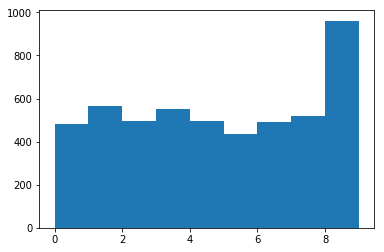

In [13]:
plt.hist(labels,bins=9)

* Gaussian Naive Bayes

In [261]:
clf = GaussianNB()
score=cross_val_score(clf,data,labels,cv=10,scoring='accuracy')
score.mean()

0.85376907343740138

* Random Forest Classifier

In [262]:
rfe=RandomForestClassifier()
score=cross_val_score(rfe,data,labels,cv=10,scoring='accuracy')
score.mean()

0.8621667435770648

* Gradient Boosting Classifier

In [248]:
gbc=GradientBoostingClassifier()
score=cross_val_score(gbc,data,labels,cv=10,scoring='accuracy')
score.mean()

0.80634715783524835

* KNN classifier

In [271]:
for i in range(2,10):
    knn=KNeighborsClassifier(n_neighbors=i,weights='distance')
    score=cross_val_score(knn,data,labels,cv=10,scoring='accuracy')
    print(score.mean())

0.945980129646
0.952962966169
0.952974869701
0.951358836379
0.951559682577
0.949371520629
0.947373018525
0.947173029544


We see that we have tremendously improved our classifier by performing PCA on the dataset. Now let's check whether the accuarcy improves if we normalize the data

* MinMax normalization for KNN

In [264]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_data=scaler.fit_transform(data)
normalized_data=pd.DataFrame(normalized_data)
normalized_data.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.098524,0.323340,0.626153,0.456236,0.574907,0.151181,0.206885,0.453073,0.573614,0.516073,...,0.437603,0.516192,0.336023,0.627326,0.541366,0.324670,0.482414,0.430395,0.545814,0.407975
1,0.445092,0.369019,0.378762,0.902155,0.691803,0.296974,0.556302,0.376468,0.392179,0.473391,...,0.615343,0.532900,0.512538,0.429079,0.575111,0.296171,0.317812,0.238738,0.426055,0.602901
2,0.677955,0.301169,0.375587,0.271455,0.252781,0.236949,0.522947,0.332224,0.316659,0.559471,...,0.377609,0.443871,0.424580,0.552696,0.455821,0.470861,0.647225,0.371072,0.517602,0.619651
3,0.169289,0.248012,0.590589,0.738965,0.540033,0.456721,0.482687,0.372072,0.548419,0.794238,...,0.373065,0.459054,0.491105,0.692173,0.345190,0.377538,0.595680,0.308197,0.505632,0.241056
4,0.261309,0.837261,0.368851,0.667841,0.439416,0.390713,0.784342,0.721262,0.357436,0.631466,...,0.560669,0.397973,0.406847,0.653328,0.491129,0.453683,0.417029,0.601793,0.619451,0.669551


In [265]:
normalized_data.shape

(5000, 26)

In [266]:
knn=KNeighborsClassifier(n_neighbors=3)
score=cross_val_score(knn,normalized_data,labels,cv=10,scoring='accuracy')
score.mean()

0.94156785711082569

* Standard Scaler for KNN

In [267]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
normalized_data=scaler.fit_transform(data)
normalized_data=pd.DataFrame(normalized_data)
normalized_data.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,-1.336869,-0.771197,0.769511,-0.206850,0.688948,-2.036048,-1.344674,-0.025008,0.606049,0.139368,...,-0.288773,0.569779,-0.925232,1.284215,0.479751,-1.205144,0.030908,-0.442001,0.541295,-0.459594
1,0.662247,-0.522801,-0.661553,2.890837,1.421611,-1.115275,0.755853,-0.514752,-0.677803,-0.128179,...,1.012917,0.700625,0.416440,-0.171405,0.718110,-1.440025,-1.434751,-1.840476,-0.462506,0.926630
2,2.005479,-0.891759,-0.679920,-1.490476,-1.330023,-1.494371,0.555339,-0.797609,-1.212190,0.411405,...,-0.728135,0.003409,-0.252117,0.736242,-0.124496,-0.000281,1.498431,-0.874868,0.304832,1.045749
3,-0.928676,-1.180820,0.563788,1.757196,0.470371,-0.106368,0.313318,-0.542858,0.427767,1.883021,...,-0.761414,0.122313,0.253529,1.760350,-0.905933,-0.769421,1.039467,-1.333653,0.204497,-1.646647
4,-0.397872,2.023428,-0.718885,1.263120,-0.160260,-0.523255,2.126725,1.689565,-0.923646,0.862700,...,0.612505,-0.356039,-0.386908,1.475134,0.124905,-0.141854,-0.551296,0.808653,1.158512,1.400618


In [270]:
knn=KNeighborsClassifier(n_neighbors=3,weights='distance')
score=cross_val_score(knn,normalized_data,labels,cv=10,scoring='accuracy')
score.mean()

0.93960378459736338

* As we see, the score has not really improved much. We can go ahead with the direct Principal Components to build the classifier.

* It is established that Neural Networks will give the best performance for this problem. Let's try that out.

Neural Network MLP classifier

In [14]:
from sklearn.neural_network import MLPClassifier
mlpc=MLPClassifier(learning_rate='adaptive',hidden_layer_sizes=(500,))
score=cross_val_score(mlpc,data,labels,cv=10,scoring='accuracy')
score.mean()

0.9124103236951655

* We see that with just 5000 data points out Neural Network has achieved a cross validation score of 91%. It is great. When we give entire 42000 data points as input, we can expect that it will beat the KNN model. However, for now let us build the model using KNN and see how far it can go

# Prediction

As per the analysis, I decide to go up with KNN with neighbors=3

In [356]:
data=pd.read_csv('Digit_dataset.csv')

In [357]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [358]:
data.shape

(42000, 785)

In [359]:
labels=data['label']
data.drop('label',axis=1,inplace=True)

perform PCA and train the data

In [360]:
""" Read the test data and concatenate it with training data. Perform PCA on both at a time. This point is really crucial.
    If we perform PCA separtely on test data and use the model we trained on training PCA data, we will fail. 
"""
test_data=pd.read_csv('test.csv')
data=pd.concat([data,test_data])

In [361]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.7)
data=pca.fit_transform(data)
data=pd.DataFrame(data)

In [368]:
""" Now separate the training data and test data"""
training_data=data.iloc[0:42000,:]
test_data=data.iloc[42000:,:]
data.shape

(70000, 26)

In [364]:
knn=KNeighborsClassifier(n_neighbors=3,weights='distance')
score=cross_val_score(knn,training_data,labels,cv=10,scoring='accuracy')
score

array([ 0.97907751,  0.97193149,  0.97429795,  0.97452987,  0.97333333,
        0.96618242,  0.97094546,  0.97331427,  0.97354623,  0.9721163 ])

* Just a check with MLP classifier

In [282]:
from sklearn.neural_network import MLPClassifier
mlpc=MLPClassifier(learning_rate='adaptive',hidden_layer_sizes=(500,))
score=cross_val_score(mlpc,data,labels,cv=10,scoring='accuracy')
score.mean()

0.96538258896688411

In [367]:
test_data.shape

(27999, 26)

In [310]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


* Use the already available PCA performed test_data

In [369]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
42000,845.662350,-130.182274,776.849293,645.536224,338.498098,513.391530,194.843284,75.405253,-316.877394,284.580341,...,-375.849304,372.392347,-308.120295,-170.287834,-261.103805,136.661175,280.336680,-473.251763,51.809086,-104.953767
42001,1150.060109,-42.099132,210.676463,-93.959362,-953.848152,442.278328,724.987042,-230.892107,401.028722,505.276583,...,570.259358,25.620834,153.095192,-149.191153,-210.876452,45.417742,-1.999095,-80.279581,-158.304546,-200.690066
42002,-503.627068,107.753933,167.663214,-85.295174,-169.299056,130.292064,-335.115904,-343.539201,-256.382520,-426.950207,...,151.286485,-80.204644,-164.002261,-158.448740,-116.620893,-155.727760,83.196448,179.579461,63.292061,8.565590
42003,-254.287072,595.593071,479.099028,404.098852,-228.083008,167.988743,-86.622208,116.914347,-93.458961,-207.618723,...,-175.829735,93.576681,-288.250824,-46.815641,108.101523,-21.118603,120.630822,-128.866254,-245.286884,42.919668
42004,-107.762966,-709.533906,12.856065,153.405248,284.114520,48.951714,55.657288,752.848512,-315.017970,6.650695,...,250.151990,-167.237059,-14.465438,-27.822876,-60.903592,-141.888801,-223.673813,-192.864152,-151.388462,9.367313


In [370]:
test_data.shape

(28000, 26)

In [371]:
knn=KNeighborsClassifier(n_neighbors=3,weights='distance')
knn.fit(training_data,labels)
prediction=knn.predict(test_data)

In [372]:
prediction.shape

(28000,)

In [373]:
prediction

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [374]:
prediction=pd.DataFrame(prediction)

In [375]:
prediction.index.names=['ImageId']

In [376]:
prediction.columns=['Label']

In [377]:
prediction.index = range(1,len(prediction)+1)
prediction.index.names=['ImageId']
prediction.head()

,Label
ImageId,
1,2
2,0
3,9
4,2
5,3


In [378]:
""" Submit this file as the solution in Kaggle. You will get 97% accuracy"""
prediction.to_csv('solution.csv')